# Magnitude of the Gradient

!['mag-binary.jpg'](mag-binary.jpg)


##  apply a threshold to the overall magnitude of the gradient, in both x and y.


- abs_sobelxy = $\sqrt{(sobel_x)^2 + (sobel_y)^2} $
- It's worth considering the size of the region in the image over which we'll be taking the gradient. 
- Modify the kernel size for the Sobel operator to change the size of this region. 
  - Taking the gradient over larger regions can smooth over noisy intensity fluctuations on small scales. 
  - The default Sobel kernel size is 3, but here we'll define a new function that takes kernel size as a parameter
  
### Code

- First Define function that take in an image and optional Sobel kernel size, as well as thresholds for gradient magnitude.
- Next, Compute the gradient magnitude, apply a threshold, and create a binary output image showing where thresholds were met.

### Test that the function returns output similar to the example below for `sobel_kernel=9, mag_thresh=(30, 100).`

!['thresh-mag-example.png'](thresh-mag-example.png)


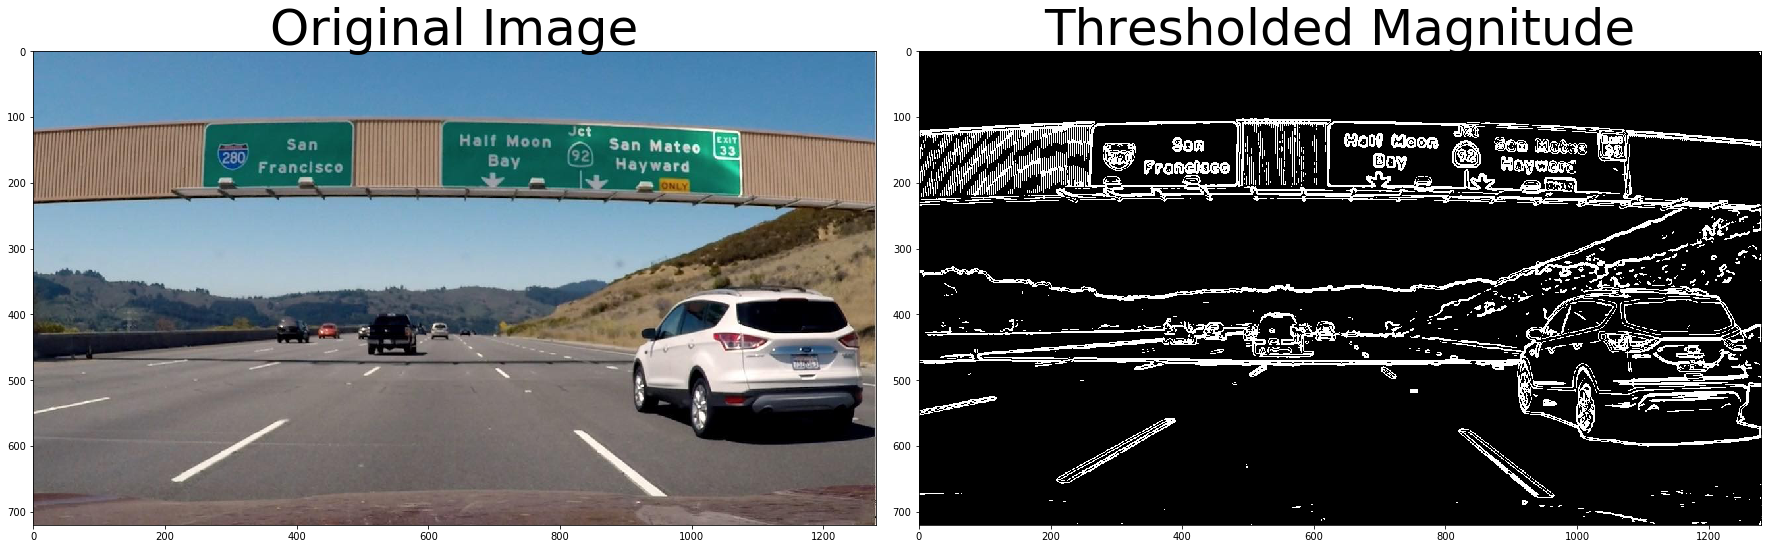

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

# Read in an image
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale    
    # 2) Take the gradient in x and y separately
    # 3) Calculate the magnitude 
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    # 5) Create a binary mask where mag thresholds are met
    # 6) Return this mask as your binary_output image
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    grad_x = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    grad_y = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    grad_mag = np.sqrt(grad_x**2 + grad_y**2)
    abs_grads = np.absolute(grad_mag)
    scaled_grads = np.uint8(255*abs_grads/np.max(abs_grads))
        
    binary_output = np.zeros_like(scaled_grads)
    binary_output[(scaled_grads >= mag_thresh[0]) & (scaled_grads <= mag_thresh[1])] = 1
    return binary_output
    
# Run the function
mag_binary = mag_thresh(image, sobel_kernel=9, mag_thresh=(30, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)